In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Splitting Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree



In [100]:
data = pd.read_csv('/content/data.csv')
data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [102]:
data.drop ('id', axis = 1, inplace = True)
data.drop ('Unnamed: 32', axis = 1, inplace = True)

In [103]:
data.shape

(569, 31)

In [104]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [105]:
data.isna ()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [106]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()


,unique count
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


## Encoding the Categorical Variable

In [107]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)
data.head (10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## **BASIC VISUALISATION OF DATASET** 

In [108]:
df = pd.DataFrame (data, columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',	'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	'concave points_se',	'symmetry_se',	'fractal_dimension_se',	'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',	'compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst'])
df.corr ()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


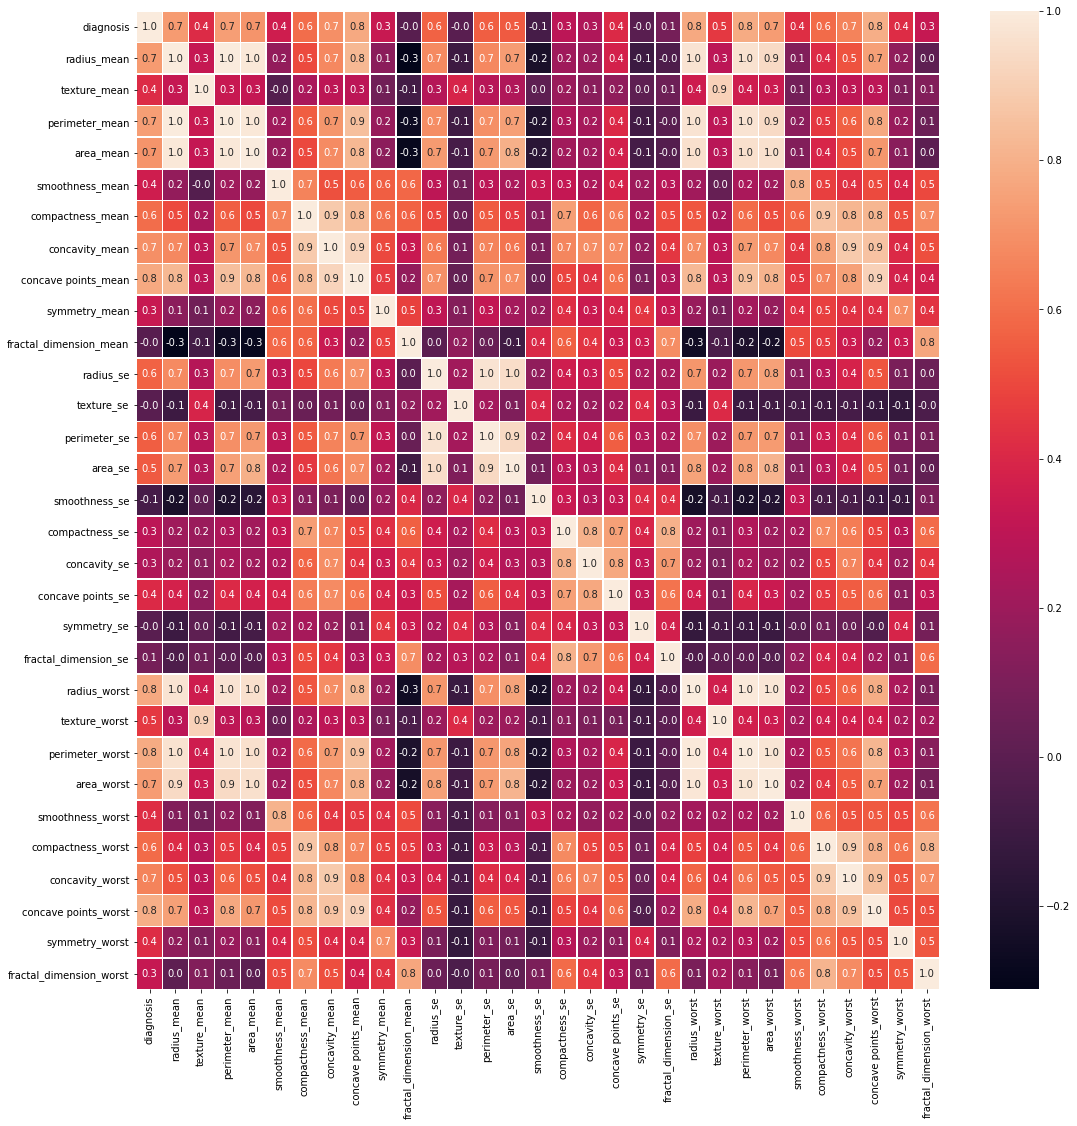

In [109]:
corr_Matrix = df.corr ()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap (corr_Matrix, linewidths = 0.5, annot = True, fmt= '.1f',ax=ax)
plt.show ()

HERE WE HAVE DROPPED THE VARIABLES **DO NOT RUN**

## PAIRPLOTS OF DATASET 

In [110]:
#sns.pairplot(data, hue = "diagnosis")
#plt.show()

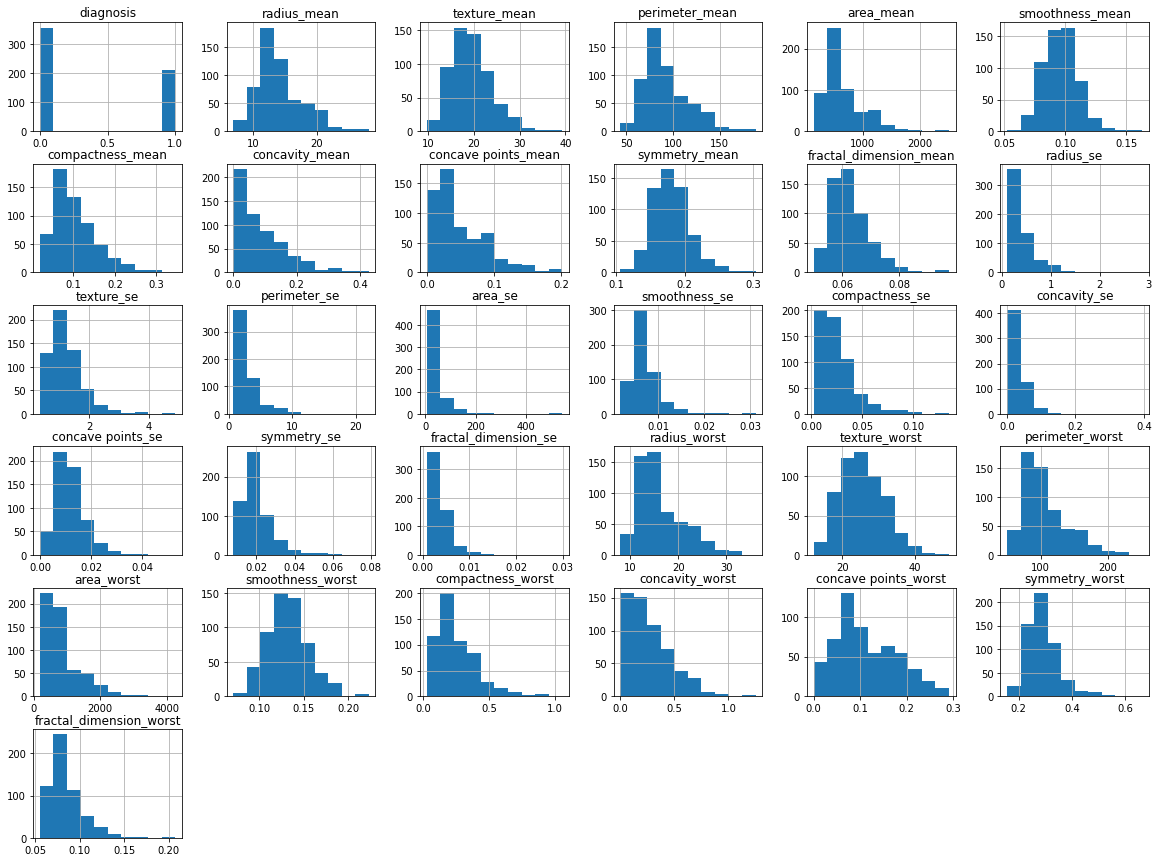

In [111]:
num_bins = 10
data.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt .show()

In the above plots, 0 corresponds to BENIGN and 1 corresponds to MALIGNANT.

The visuals show a trend that has been followed throughout each plot. At lower values of the features, the diagnosis is predominantly BENIGN and at higher values, MALIGNANT has been the chief diagnosis.

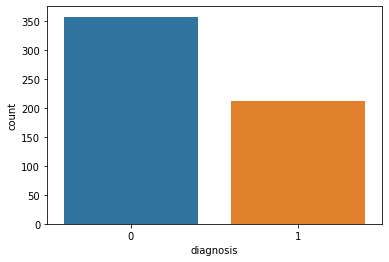

In [112]:
sns.countplot (x = 'diagnosis',data = data)
plt.show ()

class bad: (357, 31)
class good: (212, 31)
total class of Bel and Man:  0    357
1    212
Name: diagnosis, dtype: int64


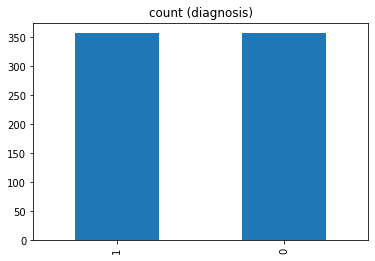

In [113]:
# class count
class_count_bad, class_count_good = data['diagnosis'].value_counts()

# Separate class
class_bad = data[data['diagnosis'] == 0]
class_good = data[data['diagnosis'] == 1]
# print the shape of the class
print('class bad:', class_bad.shape)
print('class good:', class_good.shape)

#Random over sampling
class_good_over = class_good.sample(class_count_bad, replace=True)

data1 = pd.concat([class_good_over, class_bad], axis=0)

print("total class of Bel and Man: ",data['diagnosis'].value_counts())

# plot the count after over-sampeling

data1['diagnosis'].value_counts().plot(kind='bar', title='count (diagnosis)')

##DATA PREPROCESSING

In [114]:
# X = Matrix of Features
# Y = Response Feature

X = data1.iloc [:, 1:].values
Y = data1.iloc [:, 0].values
X.shape


(714, 30)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state = 1,stratify = Y)

In [116]:
X_train.shape

(571, 30)

In [117]:
Y_train.shape

(571,)

In [118]:
print(X_test.shape,Y_test.shape)

(143, 30) (143,)


## **FEATURE SCALING** 

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
X_train = sc.fit_transform (X_train)
X_test = sc.transform (X_test)

In [120]:
print (X_train)

[[-0.94154082 -0.95891586 -0.89956007 ... -0.65708628 -1.20117959
   1.02484109]
 [-1.65826381 -1.81749325 -1.65024865 ... -1.2461648   0.43182706
   0.29106117]
 [ 1.19079116  1.60987365  1.18296989 ...  0.94029041  0.49020359
   0.65377004]
 ...
 [-0.93883824 -1.44721729 -0.9145423  ... -0.60525715 -1.28567194
  -0.88068711]
 [-0.44426695 -0.94503051 -0.35428575 ...  1.11458305  0.31968267
   2.91678077]
 [ 1.49618218 -1.22736593  1.53386949 ...  0.56265638 -0.88318112
  -0.41345118]]


In [121]:
print(Y_train )

[0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0
 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1
 1 0 0 1 0 1 1 1 0 0 0 0 

## **MODEL IMPLEMENTATIONS** 








In this section we will be building a model using the different classification algorithms that we have like K-NN, Logistic Regression, Naive Bayes, etc. and calculating the model accuracy for each algorithm to see which would be best suited for our dataset.

Also, we will be optimizing our model using methods which could result in a new classification algorithm having the best accuracy.

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score

## LOGISTIC REGRESSION

In [123]:
from sklearn.linear_model import LogisticRegression 
classifier_log = LogisticRegression ()
classifier_log.fit (X_train, Y_train)
Y_pred_log = classifier_log.predict (X_test)
cm_log = confusion_matrix (Y_test, Y_pred_log)
acc_log = accuracy_score (Y_test, Y_pred_log)


### KNN MODEL 

In [124]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier ()
classifier_knn.fit (X_train, Y_train)
Y_pred_knn = classifier_knn.predict (X_test)
cm_knn = confusion_matrix (Y_test, Y_pred_knn)
acc_knn = accuracy_score (Y_test, Y_pred_knn)

## NAIVE BAYES MODEL 

In [125]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB ()
classifier_nb.fit (X_train, Y_train)
Y_pred_nb = classifier_nb.predict (X_test)
cm_nb = confusion_matrix (Y_test, Y_pred_nb)
acc_nb = accuracy_score (Y_test, Y_pred_nb)

## SVM MODEL

In [126]:
from sklearn.svm import SVC
classifier_svm = SVC (kernel = 'rbf', random_state = 0)
classifier_svm.fit (X_train, Y_train)
Y_pred_svm = classifier_svm.predict (X_test)
cm_svm = confusion_matrix (Y_test, Y_pred_svm)
acc_svm = accuracy_score (Y_test, Y_pred_svm)

## DECISION TREE MODEL

In [127]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
classifier_dtc.fit (X_train, Y_train)
Y_pred_dtc = classifier_dtc.predict (X_test)
cm_dtc = confusion_matrix (Y_test, Y_pred_dtc)
acc_dtc = accuracy_score (Y_test, Y_pred_dtc)


## RANDOM FOREST CLASSIFIER MODEL

In [128]:
from sklearn.ensemble import RandomForestClassifier
classifier_rfc = RandomForestClassifier (n_estimators = 100, criterion = 'entropy', random_state = 1)
classifier_rfc.fit (X_train, Y_train)
Y_pred_rfc = classifier_rfc.predict (X_test)
cm_rfc = confusion_matrix (Y_test, Y_pred_rfc)
acc_rfc = accuracy_score (Y_test, Y_pred_rfc)
acc_rfc

0.993006993006993

In [129]:
print(cm_rfc)

[[70  1]
 [ 0 72]]


## ACCURACY COMPARISION

In [130]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE"]
df_pred = {"NAME OF MODEL" : ["LOGISTIC REGRESSION", "K-NN", "NAIVE BAYES", "SVM", "DECISION TREE", "RANDOM FOREST"],
           "ACCURACY SCORE " : [acc_log, acc_knn, acc_nb, acc_svm, acc_dtc, acc_rfc]}
df_predictions = pd.DataFrame (df_pred)
df_predictions


,NAME OF MODEL,ACCURACY SCORE
0,LOGISTIC REGRESSION,0.986014
1,K-NN,0.979021
2,NAIVE BAYES,0.958042
3,SVM,0.986014
4,DECISION TREE,0.972028
5,RANDOM FOREST,0.993007


## CLASSIFICATION REPORT RANDOM FOREST MODEL

In [131]:
from sklearn.metrics import classification_report
print("Accuracy Score of Random Forest Model :", accuracy_score(Y_test, Y_pred_rfc))
print(classification_report(Y_test,Y_pred_rfc))

Accuracy Score of Random Forest Model : 0.993006993006993
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.99      1.00      0.99        72

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



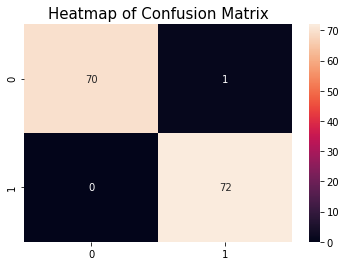

In [132]:
cm = confusion_matrix(Y_test, Y_pred_rfc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

### **CONFUSION MATRIX OF LOGISTIC REGRESSION MODEL** 

Accuracy Score of logistic Regression Model : 0.986013986013986
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.99      0.99      0.99        72

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



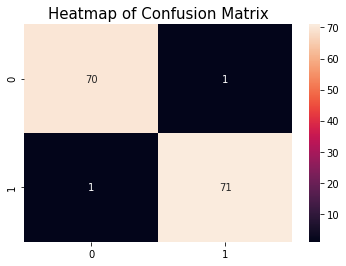

In [136]:
print("Accuracy Score of logistic Regression Model :", accuracy_score(Y_test, Y_pred_log))
print(classification_report(Y_test,Y_pred_log))
cm = confusion_matrix(Y_test, Y_pred_log)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

### CONFUSION MATRIX OF KNN

Accuracy Score of KNN Model : 0.9790209790209791
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.97      0.99      0.98        72

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



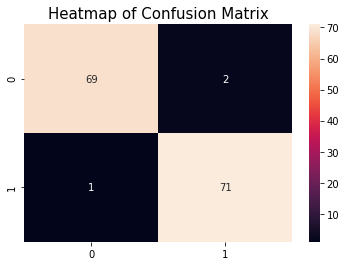

In [137]:
print("Accuracy Score of KNN Model :", accuracy_score(Y_test, Y_pred_knn))
print(classification_report(Y_test,Y_pred_knn))
cm = confusion_matrix(Y_test, Y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

### CONFUSION MATRIX OF NAIVE BAYES MODEL

Accuracy Score of Naive Bayes Model : 0.958041958041958
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.96      0.96      0.96        72

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



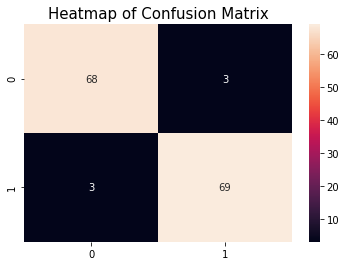

In [138]:
print("Accuracy Score of Naive Bayes Model :", accuracy_score(Y_test, Y_pred_nb))
print(classification_report(Y_test,Y_pred_nb))
cm = confusion_matrix(Y_test, Y_pred_nb)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

### CONFUSION MATRIX OF SVM 

Accuracy Score of Naive Bayes Model : 0.986013986013986
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.99      0.99      0.99        72

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



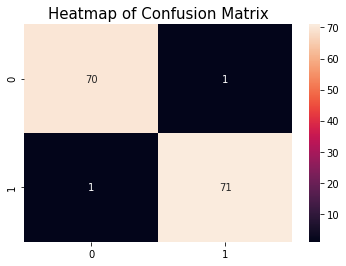

In [141]:
print("Accuracy Score of Naive Bayes Model :", accuracy_score(Y_test, Y_pred_svm))
print(classification_report(Y_test,Y_pred_svm))
cm = confusion_matrix(Y_test, Y_pred_svm)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

### CONFUSION MATRIX OF DECISION TREE

Accuracy Score of Decision Tree Model : 0.972027972027972
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        71
           1       0.95      1.00      0.97        72

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



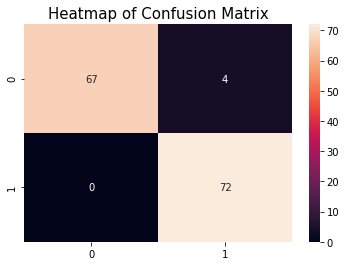

In [142]:
print("Accuracy Score of Decision Tree Model :", accuracy_score(Y_test, Y_pred_dtc))
print(classification_report(Y_test,Y_pred_dtc))
cm = confusion_matrix(Y_test, Y_pred_dtc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

## CROSS VALIDATION

In [133]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = classifier_rfc , X=X_train,y = Y_train, cv = 10)
print("Cross validation accuracy of Random Forest   model = ", cross_validation)
print("\nCross validation mean accuracy of Random Forest model = ", cross_validation.mean())

Cross validation accuracy of Random Forest   model =  [0.98275862 0.96491228 0.96491228 0.98245614 0.98245614 1.
 1.         0.98245614 0.96491228 0.96491228]

Cross validation mean accuracy of Random Forest model =  0.9789776164549305


## **SAVING BEST MODEL FOR PREDICTION** 

In [134]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [135]:
## Pickle
import pickle

# save model
pickle.dump(Y_pred_rfc, open('breast_cancer_detector.pickle', 'wb'))

# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))

# predict the output
#Y_pred = breast_cancer_detector_model.predict(X_test)

# confusion matrix
#print('Confusion matrix of Logistic Model: \n',confusion_matrix(Y_test, Y_pred),'\n')

# show the accuracy
#print('Accuracy of Random Forest = ',accuracy_score(Y_test, Y_pred))